In [1]:
# %load imports.txt
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../../')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports & Constants

In [42]:
import os
from collections import defaultdict

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold



from src.models.base.naive_bayes_classifier import NaiveBayesClassifier
from src.datasets.load_datasets import load_continuous_for_naive_bayes, load_discrete_for_naive_bayes
from src.visualizations.plots import visualize_nb_parameters
from src.settings import DATA_DIR, REPORT_DIR, RESULT_DIR

In [3]:
CONTINUOUS_DATASET_PATH = os.path.join(DATA_DIR, 'datasets', 'diabetes-continuous.csv')
DISCRETE_DATASET_PATH = os.path.join(DATA_DIR, 'datasets', 'diabetes-discrete.csv')

PLOT_PATH = os.path.join(REPORT_DIR, 'figures', 'naive-bayes')

# Experiments

In [10]:
X, y = load_continuous_for_naive_bayes(CONTINUOUS_DATASET_PATH)
SAVE_NAME = 'continuous'

# X, y = load_discrete_for_naive_bayes(DISCRETE_DATASET_PATH)
# SAVE_NAME = 'discrete'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [12]:
clf = NaiveBayesClassifier(num_epochs=500)

In [13]:
history = clf.fit(X_train, y_train)

Epoch = 0, Loss = 7441.941619873047
Epoch = 50, Loss = 7128.875885009766
Epoch = 100, Loss = 7121.076690673828
Epoch = 150, Loss = 7120.738922119141
Epoch = 200, Loss = 7120.736846923828
Epoch = 250, Loss = 7120.736907958984
Epoch = 300, Loss = 7120.736785888672
Epoch = 350, Loss = 7120.7366943359375
Epoch = 400, Loss = 7120.736602783203
Epoch = 450, Loss = 7120.736633300781
Epoch = 499, Loss = 7120.736602783203


In [14]:
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred.numpy()))
print('F1-score:', f1_score(y_test, y_pred.numpy()))

Accuracy: 0.8051948051948052
F1-score: 0.6341463414634145


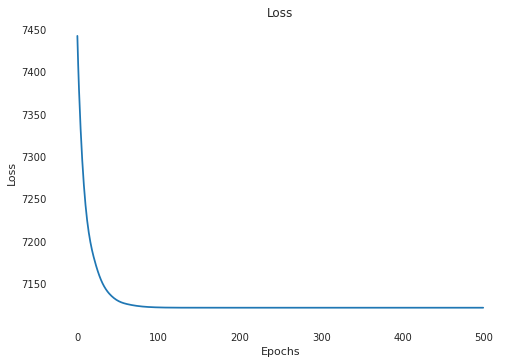

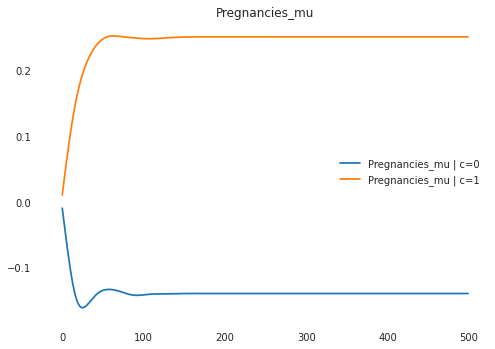

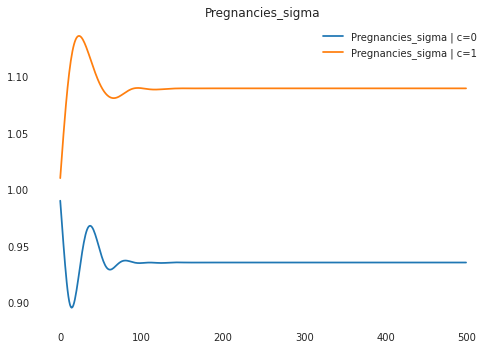

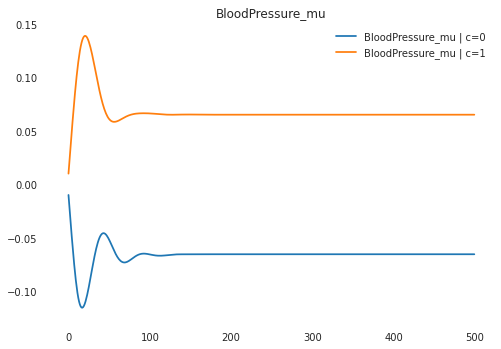

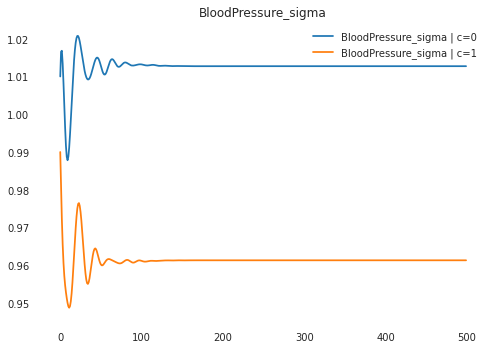

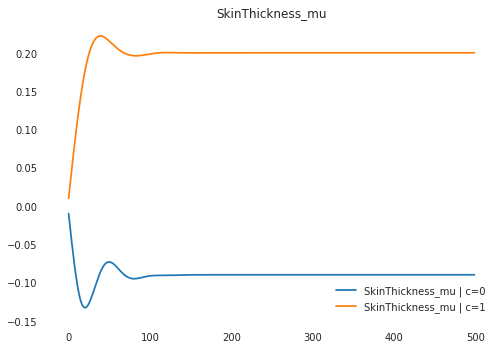

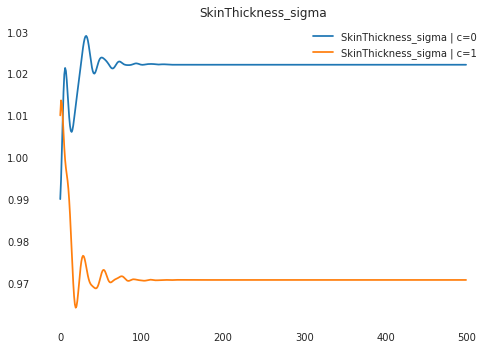

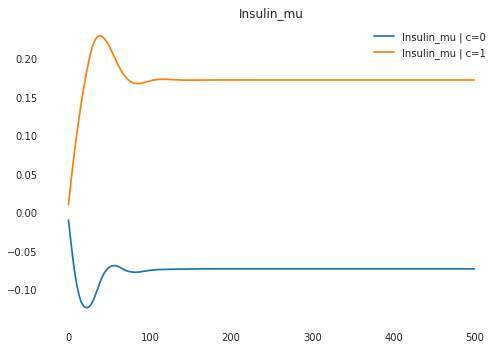

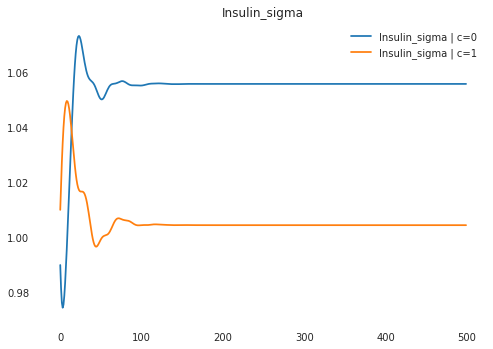

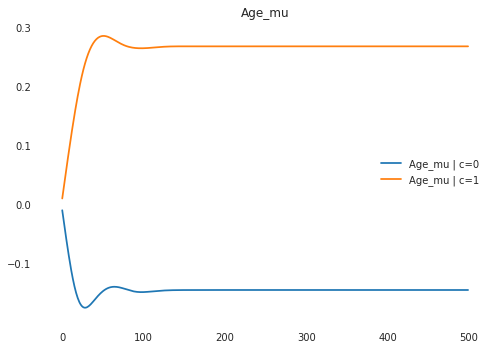

In [15]:
visualize_nb_parameters(history, f'{PLOT_PATH}/{SAVE_NAME}_')

# Score Test

In [30]:
def train_func(X_train, y_train, X_test, y_test):
    
    clf = NaiveBayesClassifier(num_epochs=500)
    history = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return {
        'Accuracy': accuracy_score(y_test, y_pred.numpy()),
        'F1-score': f1_score(y_test, y_pred.numpy()),
        'Recall': recall_score(y_test, y_pred.numpy()),
        'Precision': precision_score(y_test, y_pred.numpy())
    }

In [39]:
def k_fold_experiment(train_func, x, y, n_splits=5, shuffle=True, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    history = []

    for train_idx, test_idx in skf.split(x, y):
        x_train = x.iloc[train_idx]
        y_train = y[train_idx]
        x_test = x.iloc[test_idx]
        y_test = y[test_idx]
        history.append(train_func(x_train, y_train, x_test, y_test))

    return history

In [40]:
history = k_fold_experiment(
    train_func,
    X,
    y,
    n_splits=5,
)
history

Epoch = 0, Loss = 7289.767059326172
Epoch = 50, Loss = 6941.534576416016
Epoch = 100, Loss = 6932.7518310546875
Epoch = 150, Loss = 6932.418792724609
Epoch = 200, Loss = 6932.414886474609
Epoch = 250, Loss = 6932.415100097656
Epoch = 300, Loss = 6932.415191650391
Epoch = 350, Loss = 6932.415100097656
Epoch = 400, Loss = 6932.4150390625
Epoch = 450, Loss = 6932.415069580078
Epoch = 499, Loss = 6932.415069580078
Epoch = 0, Loss = 7442.415710449219
Epoch = 50, Loss = 7139.128448486328
Epoch = 100, Loss = 7130.764251708984
Epoch = 150, Loss = 7130.492279052734
Epoch = 200, Loss = 7130.490234375
Epoch = 250, Loss = 7130.490417480469
Epoch = 300, Loss = 7130.490173339844
Epoch = 350, Loss = 7130.490173339844
Epoch = 400, Loss = 7130.490051269531
Epoch = 450, Loss = 7130.4901123046875
Epoch = 499, Loss = 7130.490020751953
Epoch = 0, Loss = 7361.0926513671875
Epoch = 50, Loss = 7041.252593994141
Epoch = 100, Loss = 7032.039947509766
Epoch = 150, Loss = 7031.770324707031
Epoch = 200, Loss = 703

[{'Accuracy': 0.7402597402597403,
  'F1-score': 0.6078431372549019,
  'Recall': 0.5740740740740741,
  'Precision': 0.6458333333333334},
 {'Accuracy': 0.8246753246753247,
  'F1-score': 0.7157894736842105,
  'Recall': 0.6296296296296297,
  'Precision': 0.8292682926829268},
 {'Accuracy': 0.7727272727272727,
  'F1-score': 0.6464646464646464,
  'Recall': 0.5925925925925926,
  'Precision': 0.7111111111111111},
 {'Accuracy': 0.738562091503268,
  'F1-score': 0.5833333333333333,
  'Recall': 0.5283018867924528,
  'Precision': 0.6511627906976745},
 {'Accuracy': 0.7320261437908496,
  'F1-score': 0.6306306306306305,
  'Recall': 0.660377358490566,
  'Precision': 0.603448275862069}]

In [43]:
avg_metrics = defaultdict(list)

for h in history:
    for k in h:
        avg_metrics[k].append(h[k])


for k in avg_metrics:
    print(k, np.mean(avg_metrics[k]), np.std(avg_metrics[k]))

Accuracy 0.7616501145912912 0.03453422971096496
F1-score 0.6368122442735445 0.04487312571569454
Recall 0.596995108315863 0.04548810010817892
Precision 0.6881647607374229 0.07845345125039958
